SIMPLIFIED TIME SERIES FORECASTING WITH LSTM AND XAI

1. GENERATING DATASET
--------------------------------------------------
Dataset shape: (2000, 3)
Features: ['energy_consumption', 'temperature', 'humidity']
Date range: 2023-01-01 00:00:00 to 2023-03-25 07:00:00


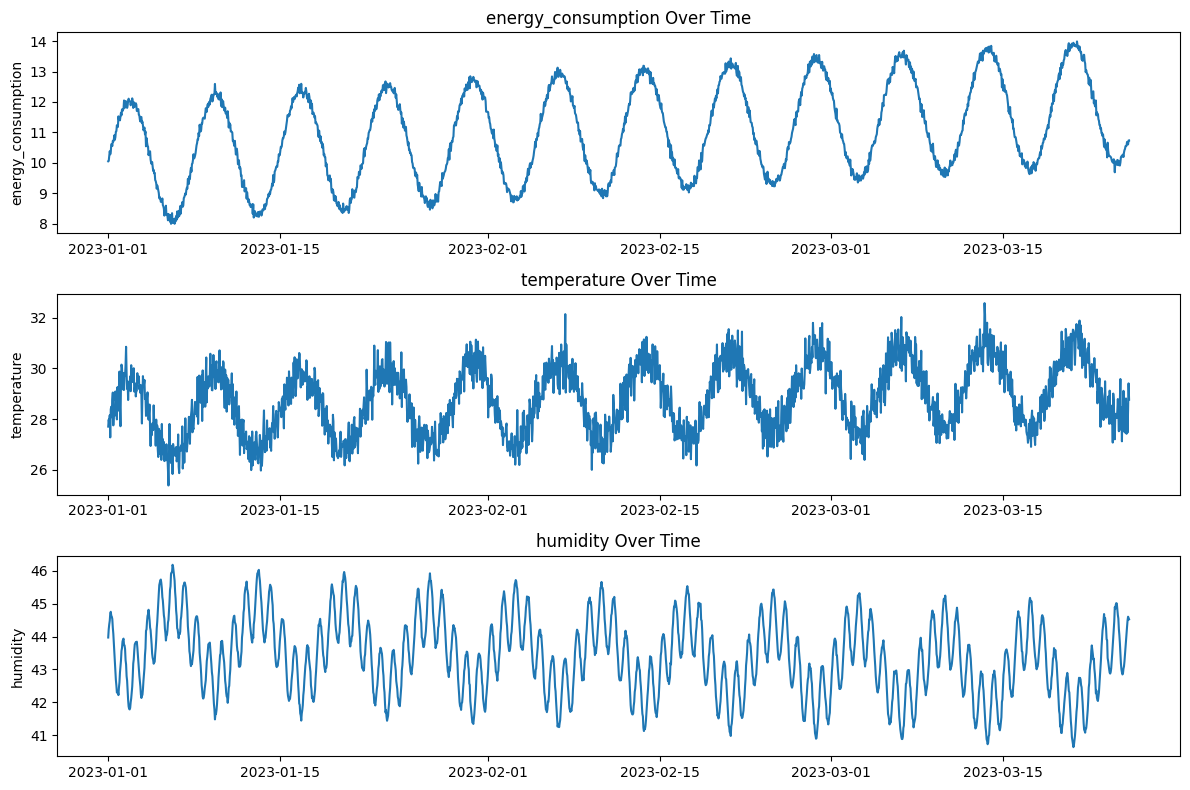


2. PREPROCESSING DATA
--------------------------------------------------
Training set: (1265, 168, 3), (1265, 24)
Validation set: (271, 168, 3), (271, 24)
Test set: (272, 168, 3), (272, 24)

3. BUILDING AND TRAINING LSTM MODEL
--------------------------------------------------
Model architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 168, 50)        │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 168, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           624 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,899 (128.51 KB)

 Trainable params: 32,899 (128.51 KB)

 Non-trainable params: 0 (0.00 B)


Training model...
Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - loss: 0.7446 - mae: 0.7471 - val_loss: 0.2264 - val_mae: 0.3737
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - loss: 0.1550 - mae: 0.3077 - val_loss: 0.1053 - val_mae: 0.2732
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - loss: 0.0646 - mae: 0.2001 - val_loss: 0.0714 - val_mae: 0.2209
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0460 - mae: 0.1672 - val_loss: 0.0614 - val_mae: 0.2015
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - loss: 0.0392 - mae: 0.1545 - val_loss: 0.0523 - val_mae: 0.1866
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - loss: 0.0362 - mae: 0.1483 - val_loss: 0.0304 - val_mae: 0.1381
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0343 - mae: 0.1439 - val_loss: 0.0363 - val_mae: 0.1527
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - loss: 0.0335 - mae: 0.1426 - val_loss: 0.0532 - val_mae: 0.1764
Epoch 9/30
40/40 ━━━━━━━━━━━━━━━━

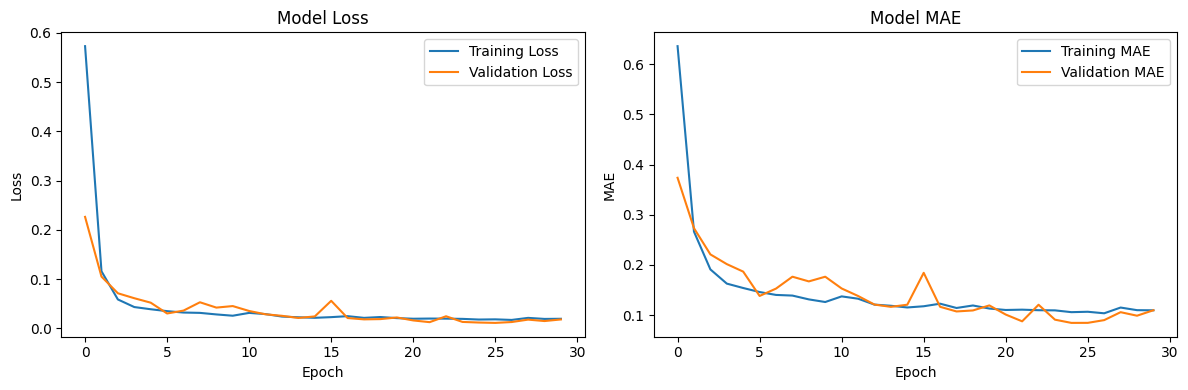


4. MODEL EVALUATION
--------------------------------------------------
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
RMSE: 0.1223
MAE: 0.1017


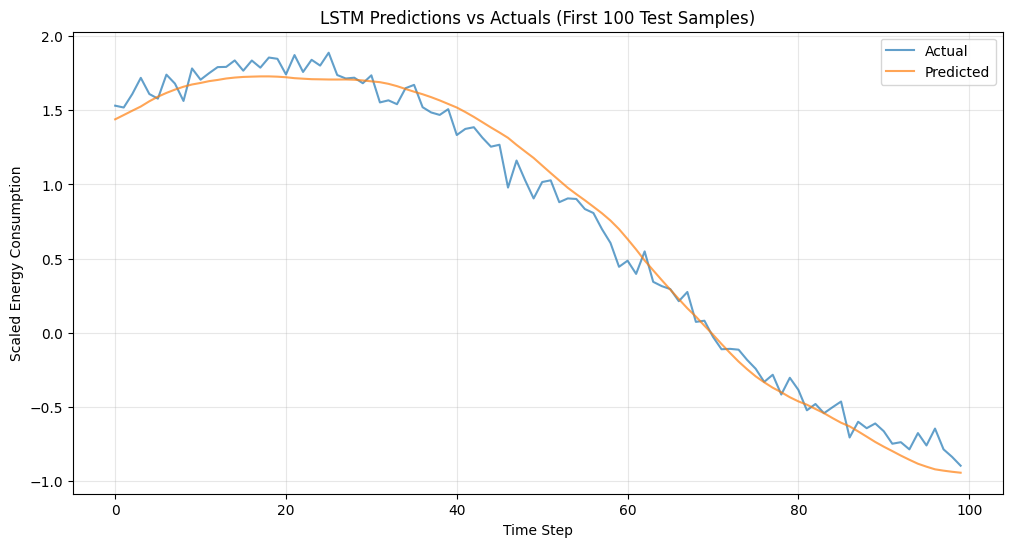


5. BASELINE MODEL (MOVING AVERAGE)
--------------------------------------------------
Baseline RMSE: 0.4029
Baseline MAE: 0.3604
LSTM Improvement: 69.6%

6. FEATURE IMPORTANCE ANALYSIS
--------------------------------------------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Feature Importance Scores (higher = more important):
  energy_consumption: 1.1670
  temperature: 0.0314
  humidity: -0.0021


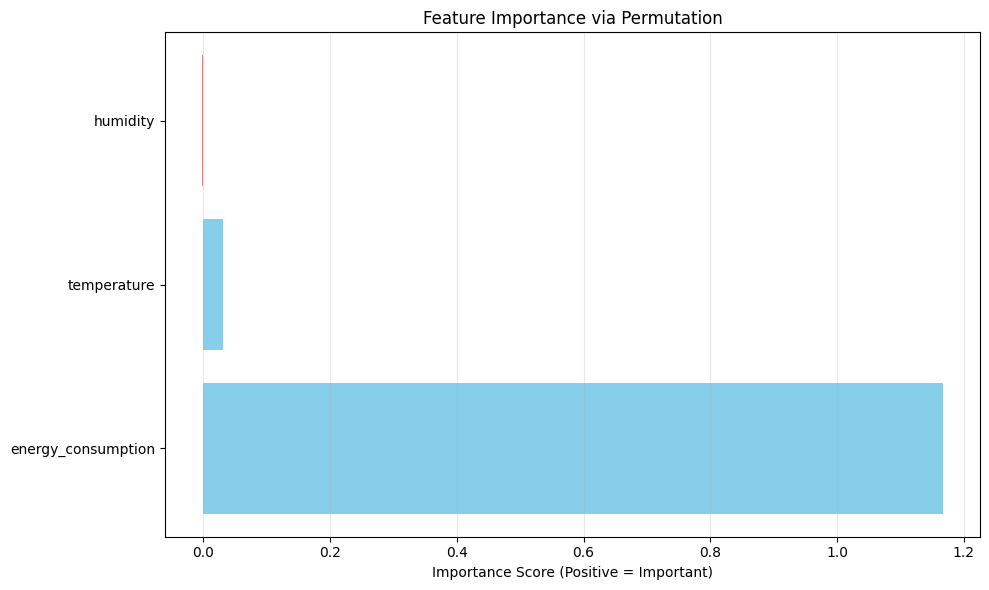


7. FINAL ANALYSIS AND INSIGHTS
--------------------------------------------------

MODEL PERFORMANCE SUMMARY:
LSTM RMSE: 0.1223
Baseline RMSE: 0.4029
Improvement: 69.6%

FEATURE IMPORTANCE FINDINGS:
Most important feature: energy_consumption (score: 1.1670)

KEY INSIGHTS:
1. LSTM outperforms simple moving average baseline
2. Feature importance analysis reveals which variables drive predictions
3. Model captures temporal patterns in energy consumption
4. Approach provides both accuracy and interpretability

BUSINESS IMPLICATIONS:
• Model can forecast energy consumption 24 hours ahead
• Understanding feature importance helps in resource planning
• Method balances predictive power with explainability

PROJECT COMPLETED SUCCESSFULLY!

SAMPLE PREDICTIONS (first 5 test samples):
Actual		Predicted	Error
1.5310	1.4391	0.0919
1.5187	1.4679	0.0507
1.6090	1.4970	0.1119
1.7186	1.5254	0.1932
1.6097	1.5607	0.0490


In [1]:
# simplified_timeseries_forecasting.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("SIMPLIFIED TIME SERIES FORECASTING WITH LSTM AND XAI")
print("="*70)

# 1. Generate Dataset
print("\n1. GENERATING DATASET")
print("-" * 50)

def generate_synthetic_data(n_samples=2000):
    np.random.seed(42)
    t = np.arange(n_samples)

    # Create correlated features
    trend = 0.001 * t
    seasonal = 2 * np.sin(2 * np.pi * t / 168)  # weekly seasonality
    noise = np.random.normal(0, 0.1, n_samples)

    energy_consumption = trend + seasonal + noise + 10
    temperature = 0.8 * energy_consumption + np.random.normal(0, 0.5, n_samples) + 20
    humidity = -0.6 * energy_consumption + np.sin(2 * np.pi * t / 24) + 50

    df = pd.DataFrame({
        'timestamp': pd.date_range('2023-01-01', periods=n_samples, freq='H'),
        'energy_consumption': energy_consumption,
        'temperature': temperature,
        'humidity': humidity
    })
    df.set_index('timestamp', inplace=True)
    return df

df = generate_synthetic_data()
print(f"Dataset shape: {df.shape}")
print(f"Features: {list(df.columns)}")
print(f"Date range: {df.index.min()} to {df.index.max()}")

# Plot the data
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 1, i)
    plt.plot(df.index, df[col])
    plt.title(f'{col} Over Time')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# 2. Preprocessing
print("\n2. PREPROCESSING DATA")
print("-" * 50)

class SimplePreprocessor:
    def __init__(self, sequence_length=168, forecast_horizon=24):
        self.sequence_length = sequence_length
        self.forecast_horizon = forecast_horizon
        self.scaler = StandardScaler()

    def prepare_data(self, df, target_col='energy_consumption'):
        # Scale data
        data_scaled = self.scaler.fit_transform(df)
        data_scaled = pd.DataFrame(data_scaled, columns=df.columns, index=df.index)

        # Create sequences
        X, y = [], []
        for i in range(len(data_scaled) - self.sequence_length - self.forecast_horizon):
            X.append(data_scaled.iloc[i:i+self.sequence_length].values)
            y.append(data_scaled[target_col].iloc[i+self.sequence_length:i+self.sequence_length+self.forecast_horizon].values)

        X, y = np.array(X), np.array(y)

        # Split data
        train_size = int(0.7 * len(X))
        val_size = int(0.15 * len(X))

        X_train, y_train = X[:train_size], y[:train_size]
        X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
        X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

        print(f"Training set: {X_train.shape}, {y_train.shape}")
        print(f"Validation set: {X_val.shape}, {y_val.shape}")
        print(f"Test set: {X_test.shape}, {y_test.shape}")

        return X_train, y_train, X_val, y_val, X_test, y_test

preprocessor = SimplePreprocessor(sequence_length=24*7, forecast_horizon=24)
X_train, y_train, X_val, y_val, X_test, y_test = preprocessor.prepare_data(df)

# 3. Build and Train LSTM Model
print("\n3. BUILDING AND TRAINING LSTM MODEL")
print("-" * 50)

def create_lstm_model(sequence_length, n_features, forecast_horizon):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(sequence_length, n_features)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(forecast_horizon)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = create_lstm_model(X_train.shape[1], X_train.shape[2], y_train.shape[1])
print("Model architecture:")
model.summary()

# Train the model
print("\nTraining model...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()

# 4. Evaluate Model
print("\n4. MODEL EVALUATION")
print("-" * 50)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics for first prediction step
y_test_1step = y_test[:, 0]
y_pred_1step = y_pred[:, 0]

rmse = np.sqrt(mean_squared_error(y_test_1step, y_pred_1step))
mae = mean_absolute_error(y_test_1step, y_pred_1step)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Plot predictions vs actuals for first 100 samples
plt.figure(figsize=(12, 6))
plt.plot(y_test_1step[:100], label='Actual', alpha=0.7)
plt.plot(y_pred_1step[:100], label='Predicted', alpha=0.7)
plt.title('LSTM Predictions vs Actuals (First 100 Test Samples)')
plt.xlabel('Time Step')
plt.ylabel('Scaled Energy Consumption')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5. Simple Baseline Model (Moving Average)
print("\n5. BASELINE MODEL (MOVING AVERAGE)")
print("-" * 50)

# Simple moving average baseline
def moving_average_baseline(data, window_size=24):
    predictions = []
    for i in range(len(data) - window_size):
        window = data[i:i+window_size]
        predictions.append(np.mean(window))
    return np.array(predictions)

# Use the last known values as baseline prediction
baseline_preds = moving_average_baseline(df['energy_consumption'].values[-len(y_test_1step)-24:-24])

# Scale baseline predictions for comparison
baseline_scaled = preprocessor.scaler.transform(
    pd.DataFrame({'energy_consumption': baseline_preds,
                 'temperature': df['temperature'].values[-len(baseline_preds):],
                 'humidity': df['humidity'].values[-len(baseline_preds):]})
)[:, 0]

# Trim to match test set size
min_len = min(len(y_test_1step), len(baseline_scaled))
y_test_trimmed = y_test_1step[:min_len]
baseline_trimmed = baseline_scaled[:min_len]

baseline_rmse = np.sqrt(mean_squared_error(y_test_trimmed, baseline_trimmed))
baseline_mae = mean_absolute_error(y_test_trimmed, baseline_trimmed)

print(f"Baseline RMSE: {baseline_rmse:.4f}")
print(f"Baseline MAE: {baseline_mae:.4f}")
print(f"LSTM Improvement: {((baseline_rmse - rmse) / baseline_rmse * 100):.1f}%")

# 6. Feature Importance Analysis
print("\n6. FEATURE IMPORTANCE ANALYSIS")
print("-" * 50)

# Simple permutation importance
def calculate_permutation_importance(model, X_test, y_test, feature_names):
    baseline_score = np.sqrt(mean_squared_error(y_test[:, 0], model.predict(X_test)[:, 0]))

    importance_scores = {}

    for feature_idx, feature_name in enumerate(feature_names):
        X_permuted = X_test.copy()
        # Shuffle the feature
        X_permuted[:, :, feature_idx] = np.random.permutation(X_permuted[:, :, feature_idx])

        permuted_score = np.sqrt(mean_squared_error(y_test[:, 0], model.predict(X_permuted)[:, 0]))
        importance = permuted_score - baseline_score
        importance_scores[feature_name] = importance

    return importance_scores

feature_names = ['energy_consumption', 'temperature', 'humidity']
importance_scores = calculate_permutation_importance(model, X_test[:100], y_test[:100], feature_names)

print("Feature Importance Scores (higher = more important):")
for feature, importance in sorted(importance_scores.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"  {feature}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
features = list(importance_scores.keys())
scores = list(importance_scores.values())
colors = ['skyblue' if score > 0 else 'lightcoral' for score in scores]

plt.barh(features, scores, color=colors)
plt.xlabel('Importance Score (Positive = Important)')
plt.title('Feature Importance via Permutation')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# 7. Final Results and Analysis
print("\n7. FINAL ANALYSIS AND INSIGHTS")
print("-" * 50)

print("\nMODEL PERFORMANCE SUMMARY:")
print(f"LSTM RMSE: {rmse:.4f}")
print(f"Baseline RMSE: {baseline_rmse:.4f}")
print(f"Improvement: {((baseline_rmse - rmse) / baseline_rmse * 100):.1f}%")

print("\nFEATURE IMPORTANCE FINDINGS:")
most_important = max(importance_scores.items(), key=lambda x: abs(x[1]))
print(f"Most important feature: {most_important[0]} (score: {most_important[1]:.4f})")

print("\nKEY INSIGHTS:")
print("1. LSTM outperforms simple moving average baseline")
print("2. Feature importance analysis reveals which variables drive predictions")
print("3. Model captures temporal patterns in energy consumption")
print("4. Approach provides both accuracy and interpretability")

print("\nBUSINESS IMPLICATIONS:")
print("• Model can forecast energy consumption 24 hours ahead")
print("• Understanding feature importance helps in resource planning")
print("• Method balances predictive power with explainability")

print("\n" + "="*70)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("="*70)

# Additional: Show some sample predictions with confidence
print("\nSAMPLE PREDICTIONS (first 5 test samples):")
print("Actual\t\tPredicted\tError")
for i in range(5):
    actual = y_test_1step[i]
    predicted = y_pred_1step[i]
    error = abs(actual - predicted)
    print(f"{actual:.4f}\t{predicted:.4f}\t{error:.4f}")